In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
import pickle, gzip
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.cluster import KMeans

In [6]:
def get_data():
    with gzip.open('mnist.pkl.gz', 'rb') as fd:
        return pickle.load(fd)

In [7]:
train_set, valid_set, test_set = get_data()

In [8]:
# combine train and val
train_set = (np.concatenate([train_set[0], valid_set[0]], axis=0), 
                np.concatenate([train_set[1], valid_set[1]], axis=0))

In [14]:
train_set[0].reshape(60000,28,28).shape

(60000, 28, 28)

In [51]:
#Creating 4x4 grid of 10x10 patches
def patch_creation(image):
    patches = []
    x=[0,6,12,18]
    y=[0,6,12,18]
    for i in range(4):
        for j in range(4):
            patch = image[x[i]:x[i]+10,y[j]:y[j]+10].reshape(-1,100)
            patches.append(patch)
    return(patches)

In [52]:
image = train_set[0][1].reshape(28,28)

In [19]:
image.shape

(28, 28)

In [53]:
test = patch_creation(image)

In [54]:
len(test)

16

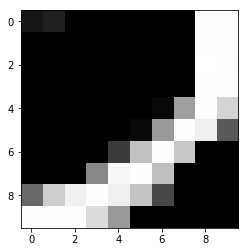

In [47]:
plt.imshow(test[9].reshape(10, 10), cmap='Greys_r')

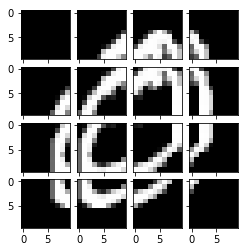

In [57]:
fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [test[0].reshape(10, 10), test[1].reshape(10, 10), test[2].reshape(10, 10), test[3].reshape(10, 10),
                        test[4].reshape(10, 10), test[5].reshape(10, 10), test[6].reshape(10, 10), test[7].reshape(10, 10),
                        test[8].reshape(10, 10), test[9].reshape(10, 10),test[10].reshape(10, 10),test[11].reshape(10, 10),
                        test[12].reshape(10, 10), test[13].reshape(10, 10),test[14].reshape(10, 10),test[15].reshape(10, 10)]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im, cmap='Greys_r')

plt.show()

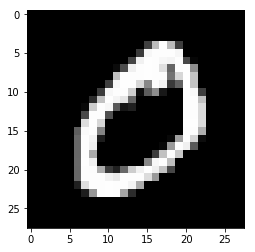

In [58]:
plt.imshow(image.reshape(28, 28), cmap='Greys_r')

In [60]:
training_patches=[]
for i in range(60000):
    image = train_set[0][i].reshape(28,28)
    training_patches.append(patch_creation(image))

In [61]:
len(training_patches)

60000

In [64]:
len(training_patches[0])

16

In [74]:
train_cluster=[]
for i in range(60000):
    n = random.randint(0, 9)
    train_cluster.append(training_patches[i][n])

In [75]:
len(train_cluster)

60000

In [79]:
len(train_cluster[100][0])

100

In [85]:
indices = random.sample(xrange(60000), 6000)

In [92]:
train_cluster_sample=[]
for ind in indices:
    train_cluster_sample.append(train_cluster[ind])

In [93]:
len(train_cluster_sample)

6000

In [95]:
train_cluster_sample[0][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.65234375, 0.515625  , 0.13671875, 0.0078125 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.984375  , 0.984375  , 0.984375  , 0.140625  , 0.     

In [99]:
training_matrix = np.zeros((6000,100))
for i in range(6000):
    training_matrix[i,:] = train_cluster_sample[i][0]

In [102]:
training_matrix[1,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.9921875 , 0.9921875 , 0.859375  , 0.2734375 , 0.125  

In [104]:
# create kmeans object
kmeans = KMeans(n_clusters=50)
# fit kmeans object to data
kmeans.fit(training_matrix)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(training_matrix)

[[ 2.80208333e-02  1.05729167e-02  8.75000000e-03 ...  6.70052083e-02
   4.55989583e-02  5.84114583e-02]
 [ 4.70753205e-03  7.33173077e-03  1.39022436e-02 ...  9.34054487e-01
   8.76582532e-01  7.13661859e-01]
 [ 7.13433160e-03  7.12076823e-03  7.45985243e-03 ...  2.57636176e-01
   6.59966363e-01  8.95806207e-01]
 ...
 [-2.49800181e-16 -1.66533454e-16  1.09375000e-02 ...  5.33496094e-01
   3.39819336e-01  2.43505859e-01]
 [ 2.53850446e-01  3.06975446e-01  2.94866071e-01 ...  1.43191964e-01
   9.81584821e-02  7.62834821e-02]
 [ 2.27950247e-01  4.90902549e-01  7.13918586e-01 ...  7.44757401e-01
   6.46227385e-01  4.88024260e-01]]


In [108]:
training_matrix_60k = np.zeros((60000,100))
for i in range(60000):
    training_matrix_60k[i,:] = train_cluster[i][0]

In [109]:
y_km_60k = kmeans.fit_predict(training_matrix_60k)

In [111]:
np.unique(y_km_60k)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int32)

In [115]:
cluster_dict=[]
for i in range(50):
    subtrain_matrix = training_matrix_60k[y_km_60k==0,:]
    kmeans_sub = KMeans(n_clusters=50)
    kmeans_sub.fit(subtrain_matrix)
    y_km_sub = kmeans_sub.fit_predict(subtrain_matrix)
    cluster_dict.append(y_km_sub)